In [149]:
# import library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [150]:
# load dataset
df = pd.read_csv("winequality-red.csv")

# check first 5 rows of dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [151]:
# check type of data, data shape, and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [152]:
# current columns description
df.columns

# Define the mapping of old column names with more than two words to new column names
column_mapping = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}

# Rename the columns using the mapping
df = df.rename(columns=column_mapping)

# Print the updated column names
print(df.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [153]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


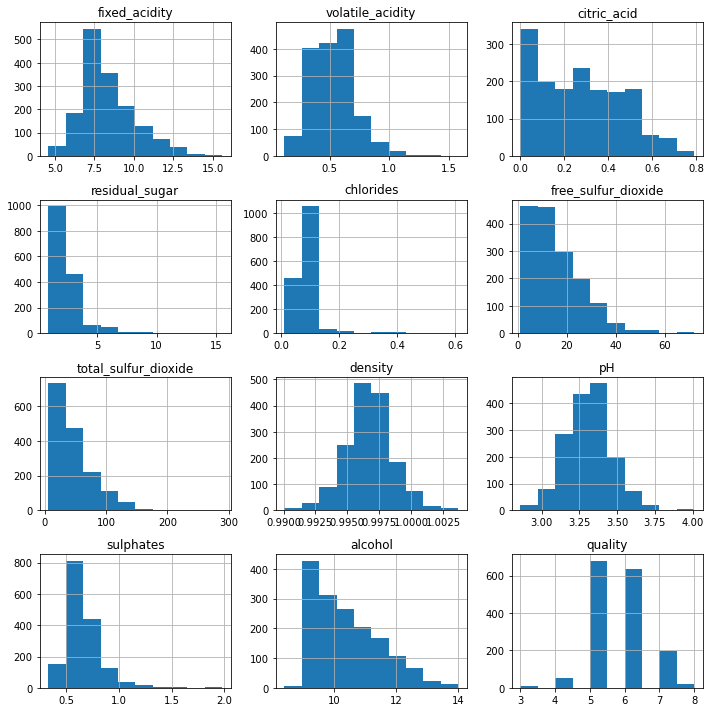

In [154]:
# Plot histograms for all features
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

<AxesSubplot:>

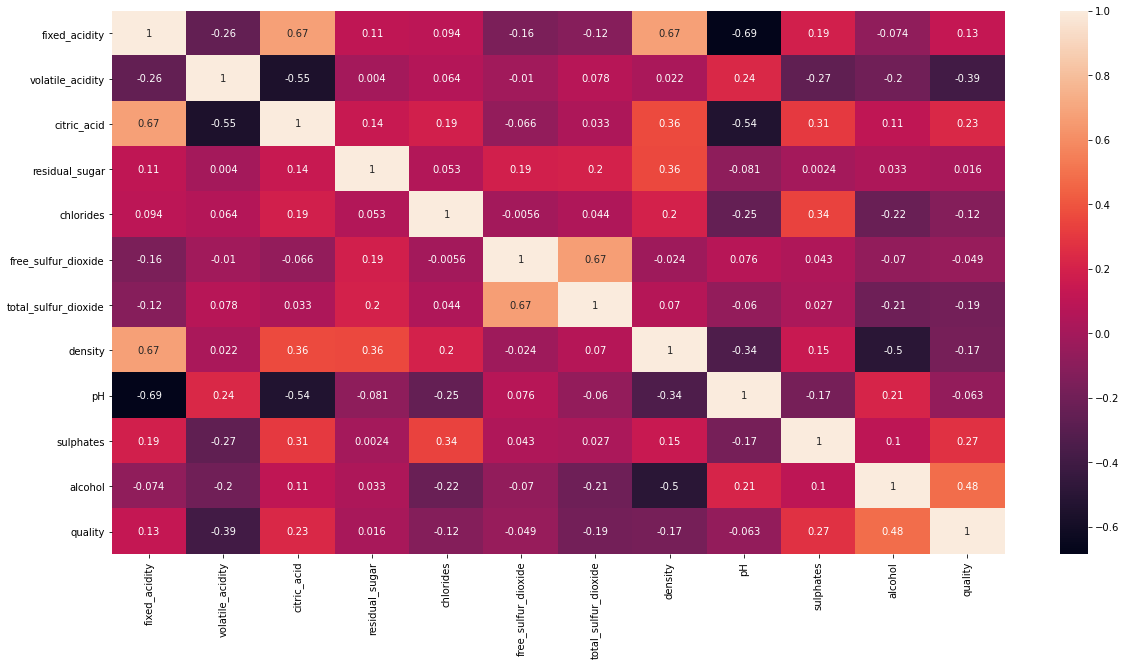

In [155]:
# visualize correlation with heatmap
# check correlation among variables
corr = df.corr()

# creat heatmap of correlation
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

In [156]:
# start PCA

# copy dataset for backup
df_pca = df.copy()
# Separate features from the target variable
X = df_pca.drop("quality", axis=1)
y = df_pca["quality"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create tabular form for data after scaled
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

# print new data frame
df_X_scaled.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.527910,0.960506,-1.394369,-0.452330,-0.245811,-0.464595,-0.377175,0.559577,1.292140,-0.591296,-0.963311
1,-0.296918,1.965419,-1.394369,0.045864,0.240520,0.874186,0.628039,0.029638,-0.730063,0.144874,-0.585966
2,-0.296918,1.295477,-1.188007,-0.167648,0.107884,-0.082086,0.232046,0.135626,-0.338669,-0.039169,-0.585966
3,1.666516,-1.384292,1.494706,-0.452330,-0.267917,0.109168,0.414812,0.665565,-0.990992,-0.468601,-0.585966
4,-0.527910,0.960506,-1.394369,-0.452330,-0.245811,-0.464595,-0.377175,0.559577,1.292140,-0.591296,-0.963311


In [157]:
# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(X_scaled)

# Access the component matrix
component_matrix = pca.components_

# conver array to tabular
df_component_matrix = pd.DataFrame(component_matrix)

# Set the column names
df_component_matrix.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

# Define the desired index labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11']

# Replace the index labels
df_component_matrix.set_axis(index_labels, axis='index', inplace=True)

# Transpose the DataFrame
transposed_data = df_component_matrix.transpose()  # or data.T

# Print the transposed DataFrame
transposed_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
fixed_acidity,0.495197,-0.097009,-0.117305,-0.222007,-0.080879,0.045904,-0.355350,-0.179873,-0.200898,-0.246481,0.643376
volatile_acidity,-0.240788,0.277941,-0.449990,0.065898,0.199472,0.321637,-0.598611,-0.072955,0.131271,0.365796,0.000167
citric_acid,0.463736,-0.150606,0.242802,-0.077993,-0.055467,0.092825,0.092353,-0.380506,0.372233,0.622755,-0.076439
residual_sugar,0.141660,0.278696,0.112110,-0.353924,0.738893,0.106530,0.271416,0.301333,-0.001371,0.091235,0.185267
chlorides,0.201558,0.144306,-0.112000,0.678503,0.226963,0.378251,0.317771,-0.337504,-0.122876,-0.196553,0.049358
free_sulfur_dioxide,-0.045455,0.502759,0.442335,-0.025254,-0.157978,-0.030459,-0.116428,-0.181605,-0.640137,0.252690,-0.053116
total_sulfur_dioxide,0.015066,0.562812,0.336958,-0.017639,-0.221855,0.119479,-0.109193,-0.001674,0.589939,-0.374871,0.072020
density,0.398082,0.247474,-0.318631,-0.164445,0.173274,-0.404531,-0.109776,-0.250484,-0.029986,-0.245713,-0.567436
pH,-0.437789,0.000994,0.058713,0.010833,0.282122,-0.501197,0.058629,-0.577599,0.149436,-0.004844,0.338483
sulphates,0.233924,-0.061146,0.278667,0.559248,0.231677,-0.434656,-0.391530,0.367296,0.072466,0.104845,0.063886


In [158]:
# Obtain eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create dataframes from the obtained values
eigenvalue_df = pd.DataFrame(eigenvalues)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigenvalue_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion

,Total,%Variance,Cumulative%
0,3.085605,28.033382,28.033382
1,1.934316,17.573669,45.607051
2,1.556546,14.141554,59.748604
3,1.193268,10.841095,70.589700
4,0.963663,8.755085,79.344785
5,0.670921,6.095460,85.440245
6,0.590544,5.365217,90.805461
7,0.425555,3.866257,94.671718
8,0.345328,3.137378,97.809096
9,0.181984,1.653363,99.462459


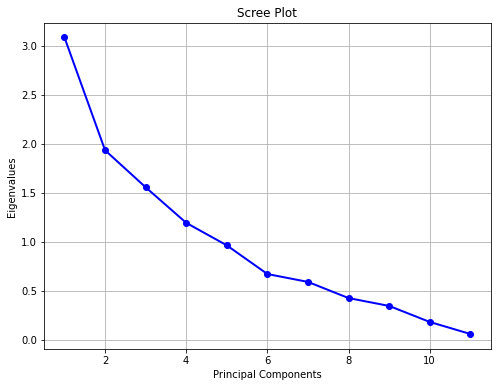

In [159]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [164]:
# calculate communality of each component
# Drop columns 6 to 11
transposed_data = transposed_data.drop(columns=transposed_data.columns[5:11])


# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)

transposed_data

,PC 1,PC 2,PC 3,PC 4,PC 5,sum_of_squares
fixed_acidity,0.495197,-0.097009,-0.117305,-0.222007,-0.080879,0.324219
volatile_acidity,-0.240788,0.277941,-0.449990,0.065898,0.199472,0.381853
citric_acid,0.463736,-0.150606,0.242802,-0.077993,-0.055467,0.305846
residual_sugar,0.141660,0.278696,0.112110,-0.353924,0.738893,0.781533
chlorides,0.201558,0.144306,-0.112000,0.678503,0.226963,0.585872
free_sulfur_dioxide,-0.045455,0.502759,0.442335,-0.025254,-0.157978,0.476087
total_sulfur_dioxide,0.015066,0.562812,0.336958,-0.017639,-0.221855,0.480056
density,0.398082,0.247474,-0.318631,-0.164445,0.173274,0.378304
pH,-0.437789,0.000994,0.058713,0.010833,0.282122,0.274818
sulphates,0.233924,-0.061146,0.278667,0.559248,0.231677,0.502546


In [161]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=5)

# Fit and transform the data into principal components
principal_components = pca.fit_transform(X_scaled)

# convert principal component into dataframe
principal_components_df = pd.DataFrame(principal_components)
principal_components_df.columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']

principal_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-1.605119,0.479194,-1.771016,0.005371,0.075607
1,-0.807780,1.855950,-0.890720,0.555048,-0.062095
2,-0.742454,0.894249,-1.166732,0.395398,-0.069972
3,2.393232,-0.222869,0.289719,-0.922971,-1.470217
4,-1.605119,0.479194,-1.771016,0.005371,0.075607
...,...,...,...,...,...
1591,-2.170825,0.774408,0.599936,0.414175,-0.259989
1592,-2.246438,0.804576,1.822590,0.460951,0.133682
1593,-1.471346,0.251256,1.124878,0.524491,0.204626
1594,-2.290752,0.921248,0.637379,0.666166,0.079135


<AxesSubplot:>

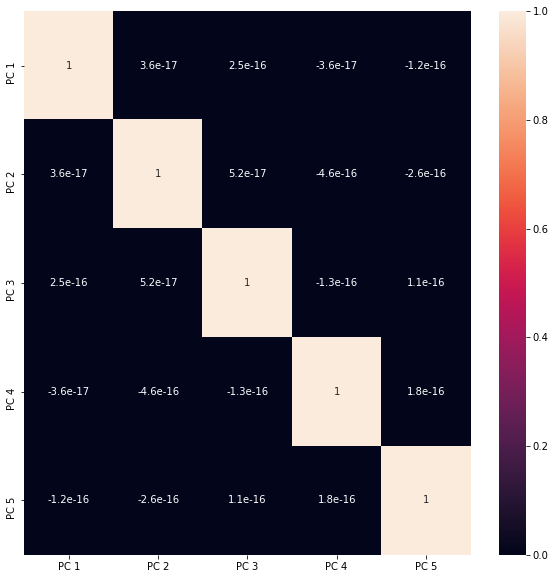

In [163]:
# visualize correlation with heatmap
# check correlation among variables
corr = principal_components_df.corr()

# creat heatmap of correlation
plt.figure(figsize = [10, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)